In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import generate_a_rectangle, generate_a_disk, generate_a_triangle
IMAGE_SIZE = 72

Using TensorFlow backend.


### <center>Sample images</center>

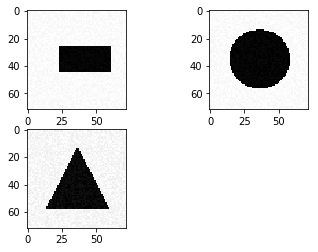

In [4]:
plt.figure()
im = generate_a_rectangle(10, True)
plt.subplot(221)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.subplot(222)
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.subplot(223)
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

# 3)  Simple Classification

### <center>Training Data</center>

In [5]:
from helpers import generate_dataset_classification
from keras.utils.np_utils import to_categorical

In [6]:
[X_train, Y_train] = generate_dataset_classification(1000, 20)

Creating data:
0
100
200
300
400
500
600
700
800
900


In [8]:
n,p = X_train.shape
print("Number of examples : {}".format(n))
print("Number of pixels : {}".format(p))
Y_train = to_categorical(Y_train, 3)

Number of examples : 1000
Number of pixels : 5184


In [9]:
y_to_class =  {0:'rectangle', 1 : 'Disk', 2 : 'Triangle'}

### <center>Model definition </center>

In [15]:
from keras.models import Sequential
from keras.optimizers import SGD

In [16]:
model = Sequential()
model.add(Dense(3, input_shape=(p,)))
model.add(Activation('softmax'))


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 15555     
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


### <center>With Stochastic gradient descent </center>

In [18]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])


In [19]:
model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
1000/1000 [==============================] - 0s 166us/step - loss: 5.8160 - acc: 0.5430
Epoch 2/100
1000/1000 [==============================] - 0s 52us/step - loss: 5.0936 - acc: 0.6840
Epoch 3/100
1000/1000 [==============================] - 0s 48us/step - loss: 5.0934 - acc: 0.6840
Epoch 4/100
1000/1000 [==============================] - 0s 50us/step - loss: 5.0934 - acc: 0.6840
Epoch 5/100
1000/1000 [==============================] - 0s 50us/step - loss: 5.0934 - acc: 0.6840
Epoch 6/100
1000/1000 [==============================] - 0s 51us/step - loss: 5.0934 - acc: 0.6840
Epoch 7/100
1000/1000 [==============================] - 0s 51us/step - loss: 5.0934 - acc: 0.6840
Epoch 8/100
1000/1000 [==============================] - 0s 47us/step - loss: 5.0934 - acc: 0.6840
Epoch 9/100
1000/1000 [==============================] - 0s 51us/step - loss: 5.0934 - acc: 0.6840
Epoch 10/100
1000/1000 [==============================] - 0s 44us/step - loss: 5.0934 - acc: 0.6840
Epoch 11

### <center>With Adam </center>

In [13]:
model = Sequential()
model.add(Dense(3, input_shape=(p,)))
model.add(Activation('softmax'))

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


### <center> Training </center>

In [15]:
model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
1000/1000 [==============================] - 0s 182us/step - loss: 1.2892 - acc: 0.5660
Epoch 2/100
1000/1000 [==============================] - 0s 56us/step - loss: 0.4160 - acc: 0.8210
Epoch 3/100
1000/1000 [==============================] - 0s 49us/step - loss: 0.2429 - acc: 0.9500
Epoch 4/100
1000/1000 [==============================] - 0s 48us/step - loss: 0.1816 - acc: 0.9800
Epoch 5/100
1000/1000 [==============================] - 0s 49us/step - loss: 0.1457 - acc: 0.9800
Epoch 6/100
1000/1000 [==============================] - 0s 49us/step - loss: 0.1105 - acc: 0.9920
Epoch 7/100
1000/1000 [==============================] - 0s 51us/step - loss: 0.0955 - acc: 0.9990
Epoch 8/100
1000/1000 [==============================] - 0s 51us/step - loss: 0.0748 - acc: 0.9960
Epoch 9/100
1000/1000 [==============================] - 0s 53us/step - loss: 0.0622 - acc: 1.0000
Epoch 10/100
1000/1000 [==============================] - 0s 52us/step - loss: 0.0564 - acc: 1.0000
Epoch 11

1000/1000 [==============================] - 0s 56us/step - loss: 0.0014 - acc: 1.0000
Epoch 84/100
1000/1000 [==============================] - 0s 62us/step - loss: 0.0014 - acc: 1.0000
Epoch 85/100
1000/1000 [==============================] - 0s 61us/step - loss: 0.0014 - acc: 1.0000
Epoch 86/100
1000/1000 [==============================] - 0s 52us/step - loss: 0.0013 - acc: 1.0000
Epoch 87/100
1000/1000 [==============================] - 0s 53us/step - loss: 0.0013 - acc: 1.0000
Epoch 88/100
1000/1000 [==============================] - 0s 54us/step - loss: 0.0013 - acc: 1.0000
Epoch 89/100
1000/1000 [==============================] - 0s 52us/step - loss: 0.0012 - acc: 1.0000
Epoch 90/100
1000/1000 [==============================] - 0s 50us/step - loss: 0.0012 - acc: 1.0000
Epoch 91/100
1000/1000 [==============================] - 0s 52us/step - loss: 0.0012 - acc: 1.0000
Epoch 92/100
1000/1000 [==============================] - 0s 48us/step - loss: 0.0012 - acc: 1.0000
Epoch 93/100


With Adam optimizer the neural network converges to a value of the loss that is a lot lower 0.05 << 5

### <center> Testing</center>

In [16]:
X_test = generate_a_triangle()[0]
X_test = X_test.reshape(1, X_test.shape[0])
prediction = model.predict(X_test)
y_to_class[np.argmax(prediction)]

'Triangle'

# 4) Visualization of the Solution

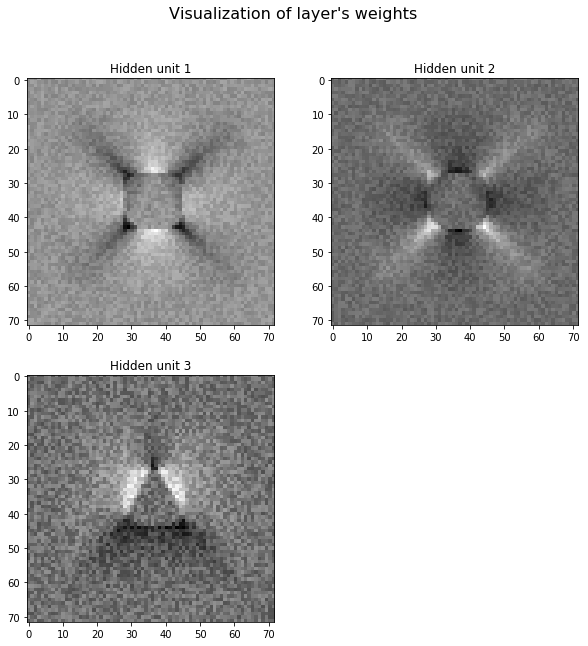

In [171]:
weights = model.get_weights()[0].reshape(IMAGE_SIZE,IMAGE_SIZE,3)
fig = plt.figure(figsize=(10,10))
fig.suptitle("Visualization of layer's weights", fontsize=16)
ax = plt.subplot("221")
ax.set_title("Hidden unit 1")
ax.imshow(weights[:,:,0], cmap='gray')


ax = plt.subplot("222")
ax.set_title("Hidden unit 2")
ax.imshow(weights[:,:,1], cmap='gray')



ax = plt.subplot("223")
ax.set_title("Hidden unit 3")
ax.imshow(weights[:,:,2], cmap='gray')

plt.show()

We can clearly see triangle, rectangle and circle shapes. The network seems to have learned what thoes shapes are.

# 5) A More Difficult Classification Problem

In [18]:
from helpers import generate_test_set_classification

In [88]:
sample_size = 1000

In [89]:
[X_train, Y_train] = generate_dataset_classification(sample_size, 20, True)

Creating data:
0
100
200
300
400
500
600
700
800
900


In [269]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
100
200


In [91]:
X_train = X_train.reshape(sample_size,IMAGE_SIZE,IMAGE_SIZE,1)
Y_train = to_categorical(Y_train)
X_test = X_test.reshape(300,IMAGE_SIZE,IMAGE_SIZE,1)

### <center>Visualization of the data </center>

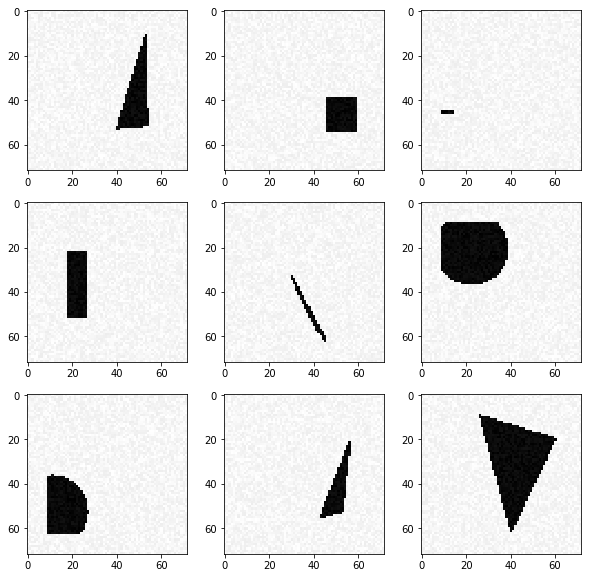

In [92]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot("33"+str(i))
    ax.imshow(X_train[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

### <center> Model definition </center>

In [31]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [94]:
model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,1,)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 68, 68, 16)        416       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 55491     
Total params: 55,907
Trainable params: 55,907
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

### <center> Training </center>

In [98]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3405 - acc: 0.8870
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3115 - acc: 0.8980
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2785 - acc: 0.9260
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2579 - acc: 0.9350
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2357 - acc: 0.9450
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.2198 - acc: 0.9450
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1968 - acc: 0.9560
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1822 - acc: 0.9620
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1712 - acc: 0.9600
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1692 - acc: 0.9590


### <center> Testing </center>

In [99]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 1ms/step


[0.5123217431704203, 0.796666665871938]

0.8 accuracy on the test set is a good result

# 6) A Regression Problem

### <center>Creation the data </center>

In [20]:
from helpers import generate_dataset_regression, visualize_prediction, generate_test_set_regression

In [21]:
sample_size = 5000

In [92]:
[X_train, Y_train] = generate_dataset_regression(sample_size, 20)

Creating data:
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [93]:
[X_test, Y_test] = generate_test_set_regression()

Creating data:
0
100
200


### <center> Reordering of the Data </center>

To make the problem easier for the neural network we order the 3 points in increasing order of distance to the origin.

In [94]:
def reorder(Z):
    for k in range(Z.shape[0]):
        Y = Z[k]
        tuples = [(Y[i],Y[i+1]) for i in range(0,6,2)]
        sorted_tuples = sorted(tuples, key= lambda x:np.sqrt(x[0]**2 + x[1]**2))
        y_ordered = []
        for tple in sorted_tuples:
            y_ordered.append(tple[0])
            y_ordered.append(tple[1])
        Z[k] = y_ordered
    return Z

In [95]:
X_train = X_train.reshape(sample_size,IMAGE_SIZE,IMAGE_SIZE,1)
Y_train = reorder(Y_train)


In [96]:
X_test = X_test.reshape(300,IMAGE_SIZE,IMAGE_SIZE,1)
Y_test = reorder(Y_test)

### <center>Visualization of the data </center>

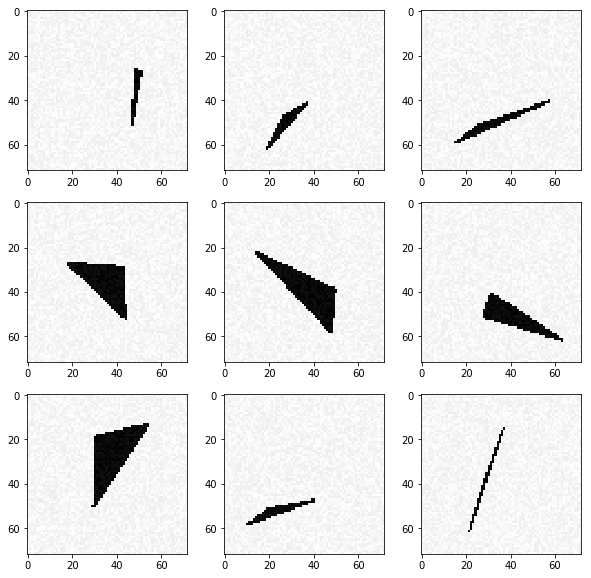

In [27]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot("33"+str(i))
    ax.imshow(X_train[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

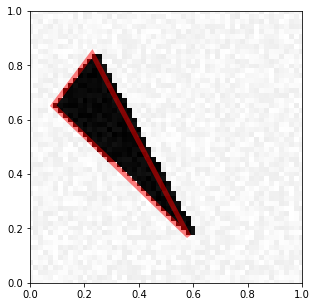

In [28]:
visualize_prediction(X_train[10], Y_train[10])

### <center> Definition of the model </center>

In [99]:
from keras.layers import Dropout
from keras import regularizers
from keras.optimizers import Adam

In [97]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,1,)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 70, 70, 8)         80        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 68, 68, 16)        1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 18496)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 110982    
Total params: 112,230
Trainable params: 112,230
Non-trainable params: 0
_________________________________________________________________


### <center> Training </center>

In [103]:
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mse'])

In [101]:
model.fit(X_train,Y_train,epochs=30,batch_size=32)

Epoch 1/30
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 2/30
5000/5000 [==============================] - 12s 2ms/step - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 3/30
5000/5000 [==============================] - 12s 2ms/step - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 4/30
5000/5000 [==============================] - 12s 2ms/step - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 5/30
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 6/30
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 7/30
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 8/30
5000/5000 [==============================] - 12s 2ms/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 9/30
5000/5000 [==============================] - 12s 2ms/step - loss: 0.0122 - mean_squar

In [102]:
model.evaluate(X_test,Y_test)

300/300 [==============================] - 0s 1ms/step


[0.014705934027830759, 0.014705934027830759]

As we can see from the evaluation, we suffer from high variance and high bias. Indeed, error on the test set is twice as large as the one on the training test. We do not generalize well, although we added a Dropout layer. Besides error on the train set is still high as human error would be almost zero. For the overfit we could try to add more data, and for the bias problem we could try to add some more layers. Training is already quite long, so we could use a GPU for that.

### <center> Visualization of the predictions </center>

In [104]:
Y_pred = model.predict(X_test)

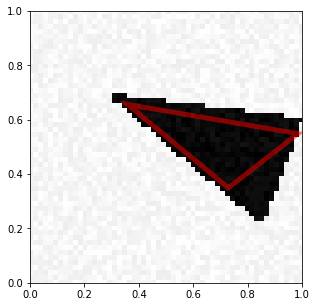

In [113]:
visualize_prediction(X_test[10],Y_pred[10])

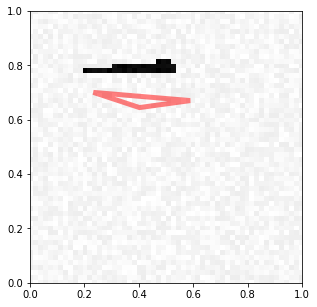

In [114]:
visualize_prediction(X_test[1],Y_pred[1])

# 7) Image Denoising

### <center> Creation of the data </center>

In [116]:
from helpers import generate_dataset_denoising

In [307]:
sample_size = 1000

In [326]:
[X_train, Y_train] = generate_dataset_denoising(sample_size,500)

Creating data:
0
100
200
300
400
500
600
700
800
900


In [327]:
X_train = X_train.reshape(sample_size,IMAGE_SIZE,IMAGE_SIZE,1)
Y_train = Y_train.reshape(sample_size,IMAGE_SIZE,IMAGE_SIZE,1)

In [315]:
[X_test, Y_test] = generate_dataset_denoising(200,500)

Creating data:
0
100


In [318]:
X_test = X_test.reshape(200,IMAGE_SIZE,IMAGE_SIZE,1)
Y_test = Y_test.reshape(200,IMAGE_SIZE,IMAGE_SIZE,1)

### <center>Visualization of the data </center>

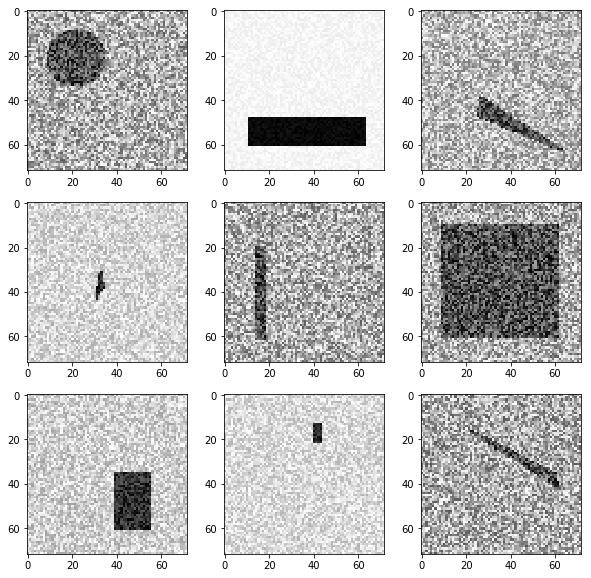

In [334]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot("33"+str(i))
    ax.imshow(X_train[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [147]:
from keras.layers import UpSampling2D

In [311]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE,IMAGE_SIZE,1,),padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_143 (Conv2D)          (None, 72, 72, 32)        320       
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 18, 18, 32)        9248      
_________________________________________________________________
up_sampling2d_49 (UpSampling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 36, 36, 32)        9248      
__________

In [312]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['binary_crossentropy'])

### <center> Model training </center>

In [328]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0341 - binary_crossentropy: 0.0341
Epoch 2/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0106 - binary_crossentropy: 0.0106
Epoch 3/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0085 - binary_crossentropy: 0.0085
Epoch 4/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0080 - binary_crossentropy: 0.0080
Epoch 5/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0078 - binary_crossentropy: 0.0078
Epoch 6/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0076 - binary_crossentropy: 0.0076
Epoch 7/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0075 - binary_crossentropy: 0.0075
Epoch 8/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.0072 - binary_crossentropy: 0.0072
Epoch 9/10
1000/1000 [==============================] - 10s 10ms/step - loss: 0.

In [329]:
model.evaluate(X_test,Y_test)

200/200 [==============================] - 1s 7ms/step


[0.007247052192687988, 0.007246882133185864]

### <center> Visualization of the predictions </center>

In [330]:
Y_pred = model.predict(X_test)

### 9 input images with noise

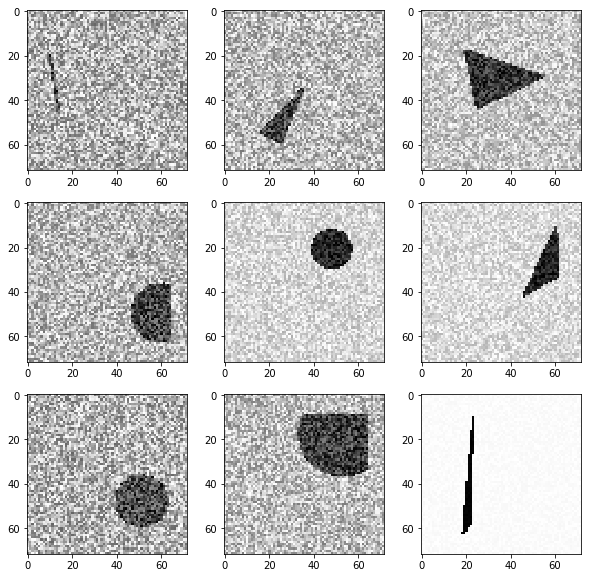

In [366]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot("33"+str(i))
    ax.imshow(X_test[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

### The nine results after denoising

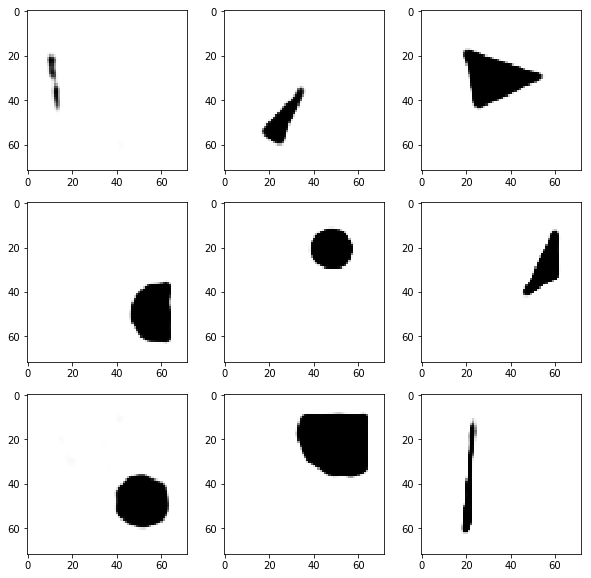

In [361]:
fig = plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot("33"+str(i))
    ax.imshow(Y_pred[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

The results are very satisfying even for images with a lot of noise as the upper left one